### Data Exploration and Analysis

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd_count_points_cleaned = pd.read_csv('../data/pd_count_points_cleaned.csv')

In [3]:
pd_raw_count_cleaned = pd.read_csv('../data/pd_raw_count_cleaned.csv')

In [4]:
pd_raw_count = pd.read_csv('../data/dft_rawcount_region_id_7.csv')

/var/folders/_z/nz5spzqj2rl11n5lc_k1cwwc0000gn/T/ipykernel_92620/254017237.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  pd_raw_count = pd.read_csv('../data/dft_rawcount_region_id_7.csv')


In [5]:
pd_raw_count.query('road_type == "Minor"')

,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,local_authority_id,local_authority_name,road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
220944,800003,N,2018,2018-07-05,7,7,East of England,186,Bedford,B530,...,7,42,5.0,2,2,1,2,4,16.0,297.0
220945,800003,N,2018,2018-07-05,8,7,East of England,186,Bedford,B530,...,3,37,8.0,2,1,2,1,4,18.0,419.0
220946,800003,N,2018,2018-07-05,9,7,East of England,186,Bedford,B530,...,1,49,6.0,2,2,1,3,0,14.0,367.0
220947,800003,N,2018,2018-07-05,10,7,East of England,186,Bedford,B530,...,1,42,7.0,2,1,0,2,1,13.0,367.0
220948,800003,N,2018,2018-07-05,11,7,East of England,186,Bedford,B530,...,3,39,3.0,1,5,0,2,4,15.0,356.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550051,999996,W,2009,2009-04-30,10,7,East of England,123,Essex,B1256,...,1,35,8.0,0,0,1,0,2,11.0,248.0
550052,999996,W,2009,2009-04-30,11,7,East of England,123,Essex,B1256,...,2,34,18.0,3,2,3,0,0,26.0,268.0
550053,999996,W,2009,2009-04-30,12,7,East of England,123,Essex,B1256,...,2,36,6.0,1,2,2,0,0,11.0,236.0
550054,999996,W,2009,2009-04-30,13,7,East of England,123,Essex,B1256,...,0,41,7.0,1,0,1,1,1,11.0,240.0


# Traffic Prediction 

Predict the volume of cars of a point at a given time:

    - What affect the number of cars at a specific point?
    - What are the daily trend /. Hourly trends / monthly trend / weekly trend
    - Does a closure at nearby point impact the traffic at that specific point
    - What affect weekend / bank holidays  have on the traffic at that specific point

In [6]:
# # Summary Statistics
# pd_count_points.describe()
# pd_raw_count.describe()

In [7]:
# pd_count_points['start_junction_road_name'].isnull().value_counts(normalize=True)

### Q1 What affect the number of cars at a specific point?

Let analyze the number of cars at specific points. The assumption we have is that the number of cars at a specfic point increases over time. Now, let plot check the hourly count of the cars in the top points.

In [8]:
pd_raw_count.head()

,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,local_authority_id,local_authority_name,road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,6003,N,2000,2000-03-31,7,7,East of England,208,Bedfordshire,M1,...,5,513,171.0,40,36,63,223,145,678.0,4006.0
1,6003,N,2000,2000-03-31,8,7,East of England,208,Bedfordshire,M1,...,11,436,203.0,17,11,60,180,119,590.0,4142.0
2,6003,N,2000,2000-03-31,9,7,East of England,208,Bedfordshire,M1,...,28,372,226.0,24,17,85,212,117,681.0,3325.0
3,6003,N,2000,2000-03-31,10,7,East of England,208,Bedfordshire,M1,...,26,457,202.0,26,22,80,262,157,749.0,3500.0
4,6003,N,2000,2000-03-31,11,7,East of England,208,Bedfordshire,M1,...,41,492,220.0,24,17,77,218,172,728.0,3693.0


In [9]:
pd_raw_count.columns

Index(['count_point_id', 'direction_of_travel', 'year', 'count_date', 'hour',
       'region_id', 'region_name', 'local_authority_id',
       'local_authority_name', 'road_name', 'road_type',
       'start_junction_road_name', 'end_junction_road_name', 'easting',
       'northing', 'latitude', 'longitude', 'link_length_km',
       'link_length_miles', 'pedal_cycles', 'two_wheeled_motor_vehicles',
       'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle',
       'hgvs_3_rigid_axle', 'hgvs_4_or_more_rigid_axle',
       'hgvs_3_or_4_articulated_axle', 'hgvs_5_articulated_axle',
       'hgvs_6_articulated_axle', 'all_hgvs', 'all_motor_vehicles'],
      dtype='object')

In [10]:
pd_raw_count.hour =  pd.to_datetime(pd_raw_count.hour, unit='h', origin='2023-01-01').dt.strftime('%I %p')

In [11]:
hourly_average_traffic = pd_raw_count.groupby(['region_name', "hour"]).aggregate({'all_motor_vehicles': 'mean'})

In [12]:
hourly_average_traffic = hourly_average_traffic.reset_index().sort_values(by=["hour"])

In [13]:
hourly_average_traffic

,region_name,hour,all_motor_vehicles
0,East of England,01 PM,469.426633
1,East of England,02 PM,491.320586
2,East of England,03 AM,28.000000
3,East of England,03 PM,544.079366
4,East of England,04 PM,616.164820
5,East of England,05 PM,650.727388
6,East of England,06 PM,518.337115
7,East of England,07 AM,573.848488
8,East of England,08 AM,621.000175
9,East of England,09 AM,488.123372


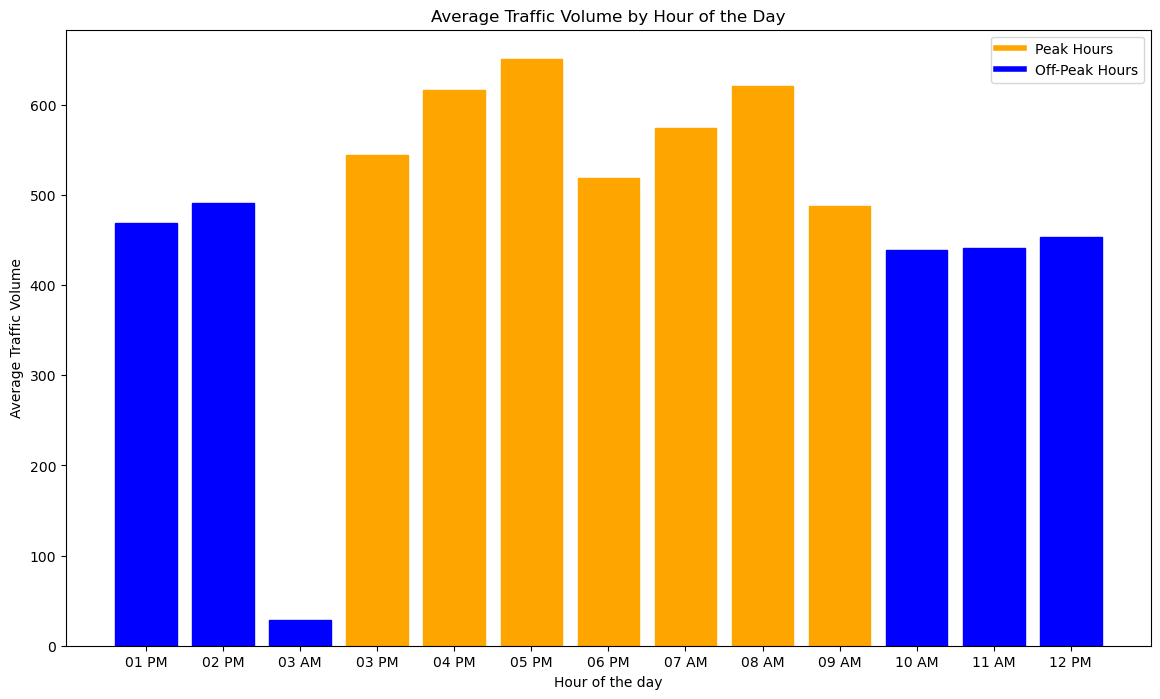

In [14]:
# generate a bar plot with matplotlib

fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(hourly_average_traffic.hour, hourly_average_traffic.all_motor_vehicles, )
peak_hours = ["07 AM", "08 AM", "09 AM", "03 PM", "04 PM", "05 PM", "06 PM"]
# Assign colors to the bars based on whether they are in peak hours or not
for bar, hour in zip(bars, hourly_average_traffic.hour):
    if hour in peak_hours:
        bar.set_color('orange')
    else:
        bar.set_color('blue')

# Create custom labels for the legend
custom_lines = [plt.Line2D([0], [0], color='orange', lw=4),
                plt.Line2D([0], [0], color='blue', lw=4)]

# Add the legend to the plot
ax.legend(custom_lines, ['Peak Hours', 'Off-Peak Hours'])
ax.set_ylabel('Average Traffic Volume')
ax.set_xlabel('Hour of the day')
ax.set_title('Average Traffic Volume by Hour of the Day')
plt.show()

The above picture describes the hourly traffic average per hour. The highest average traffic volume happen during the AM peak hours and the PM peak hours. This correlate well wiht hte TFL definition of peak hours.

__As from this graph, we can say that one of the factors that affect the traffic voalume is the time of the day.__

Let now check how the hourly average vary for each city in the region.

We will analyze the daily traffice volume per city, as well as the yearly volume per city. We will plot the city with the highest daily volume.

In [15]:
pd_raw_count.local_authority_name.unique()

array(['Bedfordshire', 'Central Bedfordshire', 'Hertfordshire',
       'Cambridgeshire', 'Luton', 'Essex', 'Suffolk', 'Southend-on-Sea',
       'Thurrock', 'Peterborough', 'Norfolk', 'Bedford'], dtype=object)

In [16]:
total_traffic_count_per_city = pd_raw_count.groupby(['local_authority_name', "hour"]).aggregate({'all_motor_vehicles': 'sum'}).reset_index()

In [17]:
total_traffic_count_per_city

,local_authority_name,hour,all_motor_vehicles
0,Bedford,01 PM,312874.0
1,Bedford,02 PM,329547.0
2,Bedford,03 PM,371682.0
3,Bedford,04 PM,426455.0
4,Bedford,05 PM,442235.0
...,...,...,...
140,Thurrock,08 AM,1298283.0
141,Thurrock,09 AM,1053107.0
142,Thurrock,10 AM,956229.0
143,Thurrock,11 AM,968854.0


In [18]:
total_traffic_count_per_city["is_on_peak"] = total_traffic_count_per_city.hour.isin(peak_hours)

In [19]:
total_traffic_count_per_city.sort_values

<bound method DataFrame.sort_values of     local_authority_name   hour  all_motor_vehicles  is_on_peak
0                Bedford  01 PM            312874.0       False
1                Bedford  02 PM            329547.0       False
2                Bedford  03 PM            371682.0        True
3                Bedford  04 PM            426455.0        True
4                Bedford  05 PM            442235.0        True
..                   ...    ...                 ...         ...
140             Thurrock  08 AM           1298283.0        True
141             Thurrock  09 AM           1053107.0        True
142             Thurrock  10 AM            956229.0       False
143             Thurrock  11 AM            968854.0       False
144             Thurrock  12 PM           1008121.0       False

[145 rows x 4 columns]>

In [20]:
total_traffic_count_per_city = total_traffic_count_per_city.groupby(["local_authority_name", "is_on_peak"]).agg({"all_motor_vehicles": "sum"}).reset_index()

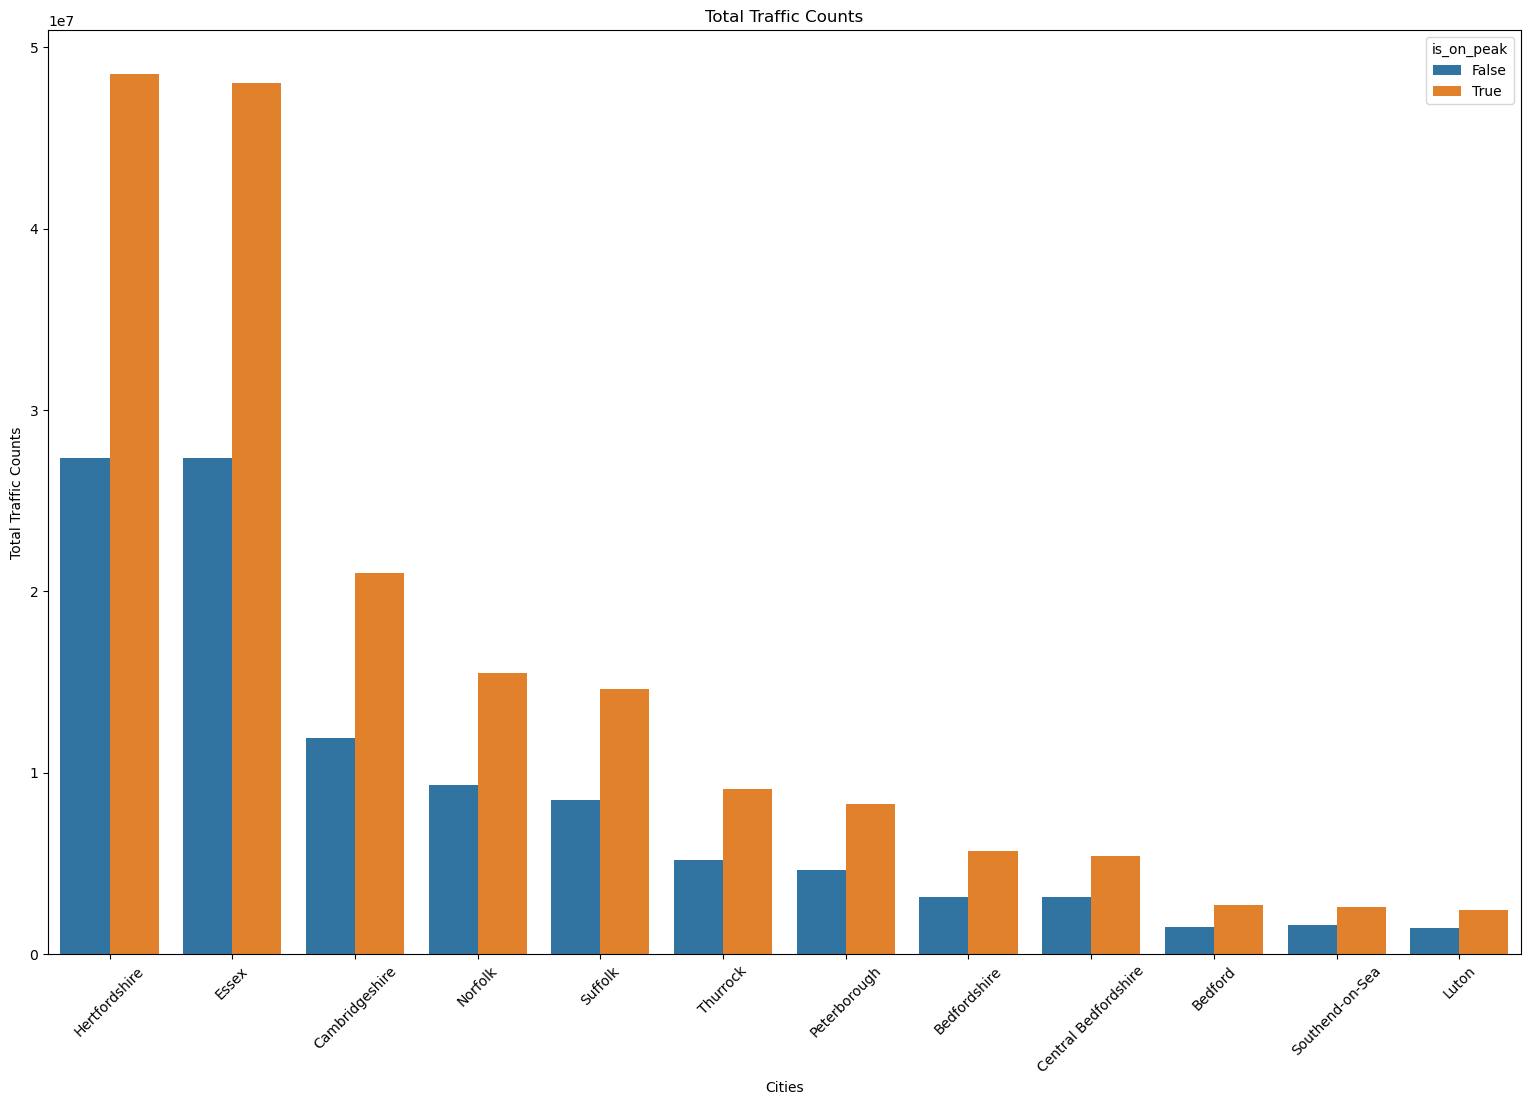

In [21]:
plt.figure(figsize=(19,12))
ax =  sns.barplot(x='local_authority_name', y='all_motor_vehicles', hue='is_on_peak', data=total_traffic_count_per_city.sort_values('all_motor_vehicles', ascending=False))
ax.set_title("Total Traffic Counts")
ax.set_xlabel("Cities")
ax.set_ylabel("Total Traffic Counts")
ax.tick_params(axis='x', labelrotation=45)
plt.show()

From the first analysis, we can see that the region with the higest number of vehiccles are hedforshire, Esses, cambridegshire, and the one with the lowest number of vehiccles are the counties of Bedford, and Lutton. However this picture need to be taken with a grain of salt, as the size of the region may affect the number of vehicles in that region.

To get more insight, we can complemment this data with the region size and create a column name vehiculles per size, and visualize if we will have the same trend with that column.

In [22]:
total_traffic_count_per_city = total_traffic_count_per_city.groupby("local_authority_name").agg({"all_motor_vehicles": "sum"})\
    .sort_values(by="all_motor_vehicles", ascending=False)\
    .reset_index()

### Geo visualization 

#### How Does the traffic volume with the size of the Region?

In this section, we will plot a map of the Essxe region and visualize the traffic volume per each region on the map. We will use geopandas to plot the map and matplotlib to visualize the traffic volume.

The shape files by counties were downloaded from the [UK Statistic Authority Website](https://statistics.ukdataservice.ac.uk/dataset/2011-census-geography-boundaries-counties)

In [23]:
import geopandas as gpd

In [24]:
uk_shape_files_by_counties = "../data/uk_shapefiles_by_counties/infuse_cnty_lyr_2011_clipped.shp"
uk_map  = gpd.read_file(uk_shape_files_by_counties)

In [25]:
uk_map.head()

,geo_label,geo_code,geometry
0,Worcestershire,E10000034,"POLYGON ((388956.762 280597.560, 388956.558 28..."
1,Cambridgeshire,E10000003,"MULTIPOLYGON (((544771.686 281972.691, 544689...."
2,Surrey,E10000030,"POLYGON ((510169.788 171375.608, 510186.456 17..."
3,Hertfordshire,E10000015,"POLYGON ((522475.130 235675.561, 522511.595 23..."
4,West Midlands,E11000005,"POLYGON ((434069.000 283791.211, 434071.000 28..."


In [26]:
uk_map.geometry = uk_map.geometry.scale(xfact=1/1e4, yfact=1/1e4, zfact=1.0, origin=(0, 0))

In [27]:
uk_map.head()

,geo_label,geo_code,geometry
0,Worcestershire,E10000034,"POLYGON ((38.896 28.060, 38.896 28.060, 38.895..."
1,Cambridgeshire,E10000003,"MULTIPOLYGON (((54.477 28.197, 54.469 28.192, ..."
2,Surrey,E10000030,"POLYGON ((51.017 17.138, 51.019 17.137, 51.019..."
3,Hertfordshire,E10000015,"POLYGON ((52.248 23.568, 52.251 23.573, 52.253..."
4,West Midlands,E11000005,"POLYGON ((43.407 28.379, 43.407 28.379, 43.407..."


Renaming the columns to make sure we have the same column name accross all the datasets.

In [28]:
uk_map = uk_map.rename({"geo_label": "local_authority_name", }, axis="columns")

In [29]:
uk_map.head()

,local_authority_name,geo_code,geometry
0,Worcestershire,E10000034,"POLYGON ((38.896 28.060, 38.896 28.060, 38.895..."
1,Cambridgeshire,E10000003,"MULTIPOLYGON (((54.477 28.197, 54.469 28.192, ..."
2,Surrey,E10000030,"POLYGON ((51.017 17.138, 51.019 17.137, 51.019..."
3,Hertfordshire,E10000015,"POLYGON ((52.248 23.568, 52.251 23.573, 52.253..."
4,West Midlands,E11000005,"POLYGON ((43.407 28.379, 43.407 28.379, 43.407..."


In [30]:
total_traffic_count_per_city.local_authority_name.unique()

array(['Hertfordshire', 'Essex', 'Cambridgeshire', 'Norfolk', 'Suffolk',
       'Thurrock', 'Peterborough', 'Bedfordshire', 'Central Bedfordshire',
       'Bedford', 'Southend-on-Sea', 'Luton'], dtype=object)

In [31]:
uk_map.head()

,local_authority_name,geo_code,geometry
0,Worcestershire,E10000034,"POLYGON ((38.896 28.060, 38.896 28.060, 38.895..."
1,Cambridgeshire,E10000003,"MULTIPOLYGON (((54.477 28.197, 54.469 28.192, ..."
2,Surrey,E10000030,"POLYGON ((51.017 17.138, 51.019 17.137, 51.019..."
3,Hertfordshire,E10000015,"POLYGON ((52.248 23.568, 52.251 23.573, 52.253..."
4,West Midlands,E11000005,"POLYGON ((43.407 28.379, 43.407 28.379, 43.407..."


In [32]:
total_traffic_count_per_city

,local_authority_name,all_motor_vehicles
0,Hertfordshire,75890679.0
1,Essex,75422684.0
2,Cambridgeshire,32918964.0
3,Norfolk,24802925.0
4,Suffolk,23120607.0
5,Thurrock,14289708.0
6,Peterborough,12930869.0
7,Bedfordshire,8856583.0
8,Central Bedfordshire,8528046.0
9,Bedford,4240226.0


In [33]:
essex_map = uk_map.loc[uk_map.local_authority_name.str.lower().isin(total_traffic_count_per_city.local_authority_name.str.lower().values)]

In [34]:
essex_map

,local_authority_name,geo_code,geometry
1,Cambridgeshire,E10000003,"MULTIPOLYGON (((54.477 28.197, 54.469 28.192, ..."
3,Hertfordshire,E10000015,"POLYGON ((52.248 23.568, 52.251 23.573, 52.253..."
9,Suffolk,E10000029,"MULTIPOLYGON (((63.920 24.811, 63.920 24.811, ..."
17,Norfolk,E10000020,"MULTIPOLYGON (((62.308 30.887, 62.308 30.887, ..."
31,Essex,E10000012,"MULTIPOLYGON (((58.405 19.554, 58.405 19.554, ..."


In [35]:
essex_data_with_counts = essex_map.merge(total_traffic_count_per_city).loc[:, ["local_authority_name", "all_motor_vehicles", "geometry"]]

0    Annotation(53.8647, 27.3205, 'Cambridgeshire')
1     Annotation(52.2937, 21.6063, 'Hertfordshire')
2           Annotation(60.9021, 26.2487, 'Suffolk')
3           Annotation(59.9855, 31.2221, 'Norfolk')
4             Annotation(57.6606, 21.5636, 'Essex')
dtype: object

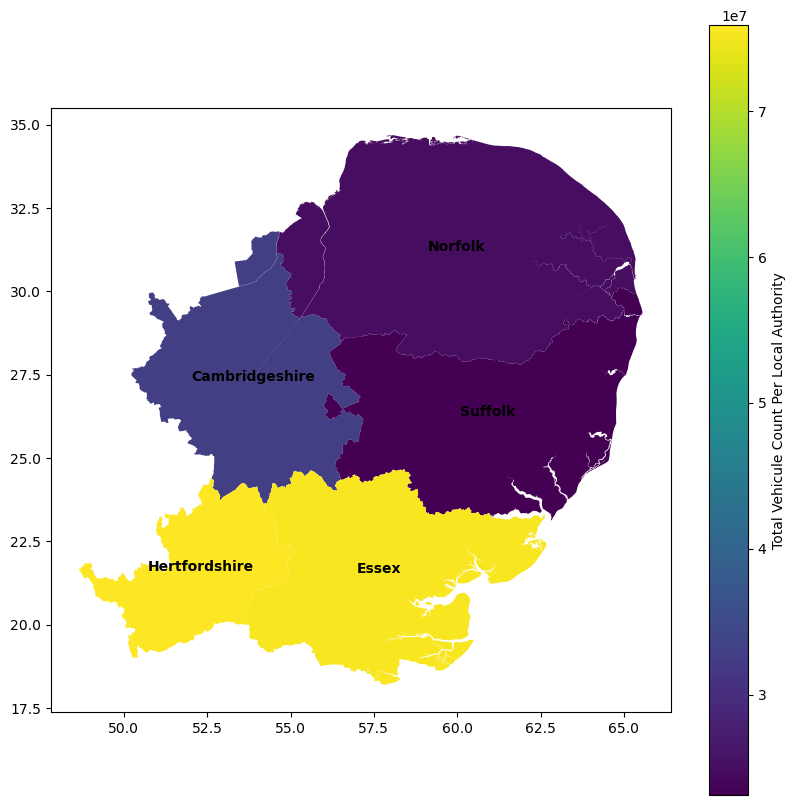

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
essex_data_with_counts.plot(
    column="all_motor_vehicles",
    legend=True,
    legend_kwds={"label": "Total Vehicule Count Per Local Authority"},
    ax=ax,
);
essex_data_with_counts.apply(lambda x: ax.annotate(text=x.local_authority_name, xy=x.geometry.centroid.coords[0], xytext=(0,0), textcoords='offset pixels', ha='center', color = "black", weight='semibold'), axis="columns")

The picture above try to plot the traffic volume for each region on the Essex map. This image show us the region with the higgest traffic volumes are the region in the south  of East Anglia. Those regions are closer to London. The Region with the lowest traffic are the Sufflok and Norflk areas. This is due tho the fact that the Sufflok and Norflk areas are further from London.

#### Analysis of the missing region



In [37]:
missing_regions = total_traffic_count_per_city.loc[~total_traffic_count_per_city.local_authority_name.isin(essex_map.local_authority_name)]

In [38]:
missing_regions

,local_authority_name,all_motor_vehicles
5,Thurrock,14289708.0
6,Peterborough,12930869.0
7,Bedfordshire,8856583.0
8,Central Bedfordshire,8528046.0
9,Bedford,4240226.0
10,Southend-on-Sea,4186909.0
11,Luton,3899276.0


The shape files we have does not have the information geographical information about the following regions:

- Thurrock, Peterborough, Bedforshire, Bedford, Southend on Sea, and Lutton. 
By analyzing the count of those region, we found that the traffic voloume in those regions are low comppared to the traffic in the major region.

Also those regions, can be included in bigger admistrative regions by looking at the admistrative map of the Uk. EX, Peterborough is a part of Cambridgeshire, and Thurrock is a part of Essex, Southend of the Sea is part of Essex. 

Further analysis can be done and merge the data for those region with the main regional data.